In [2]:
import pandas as pd
import numpy as np
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
CancerData = pd.read_csv('../data/cancer_reg.csv', encoding = 'ISO-8859-1')
CancerData.head()
CancerData.shape

(3047, 34)

In [11]:
CancerData.drop_duplicates()
CancerData

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [13]:
CancerData.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [14]:
CancerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [15]:
# any missing data?
CancerData.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [17]:
CancerData.drop(['PctPrivateCoverageAlone', 'PctSomeCol18_24'], axis=1, inplace=True)

KeyError: "['PctPrivateCoverageAlone', 'PctSomeCol18_24'] not found in axis"

In [19]:
CancerData.drop('Geography', axis=1, inplace=True)

KeyError: "['Geography'] not found in axis"

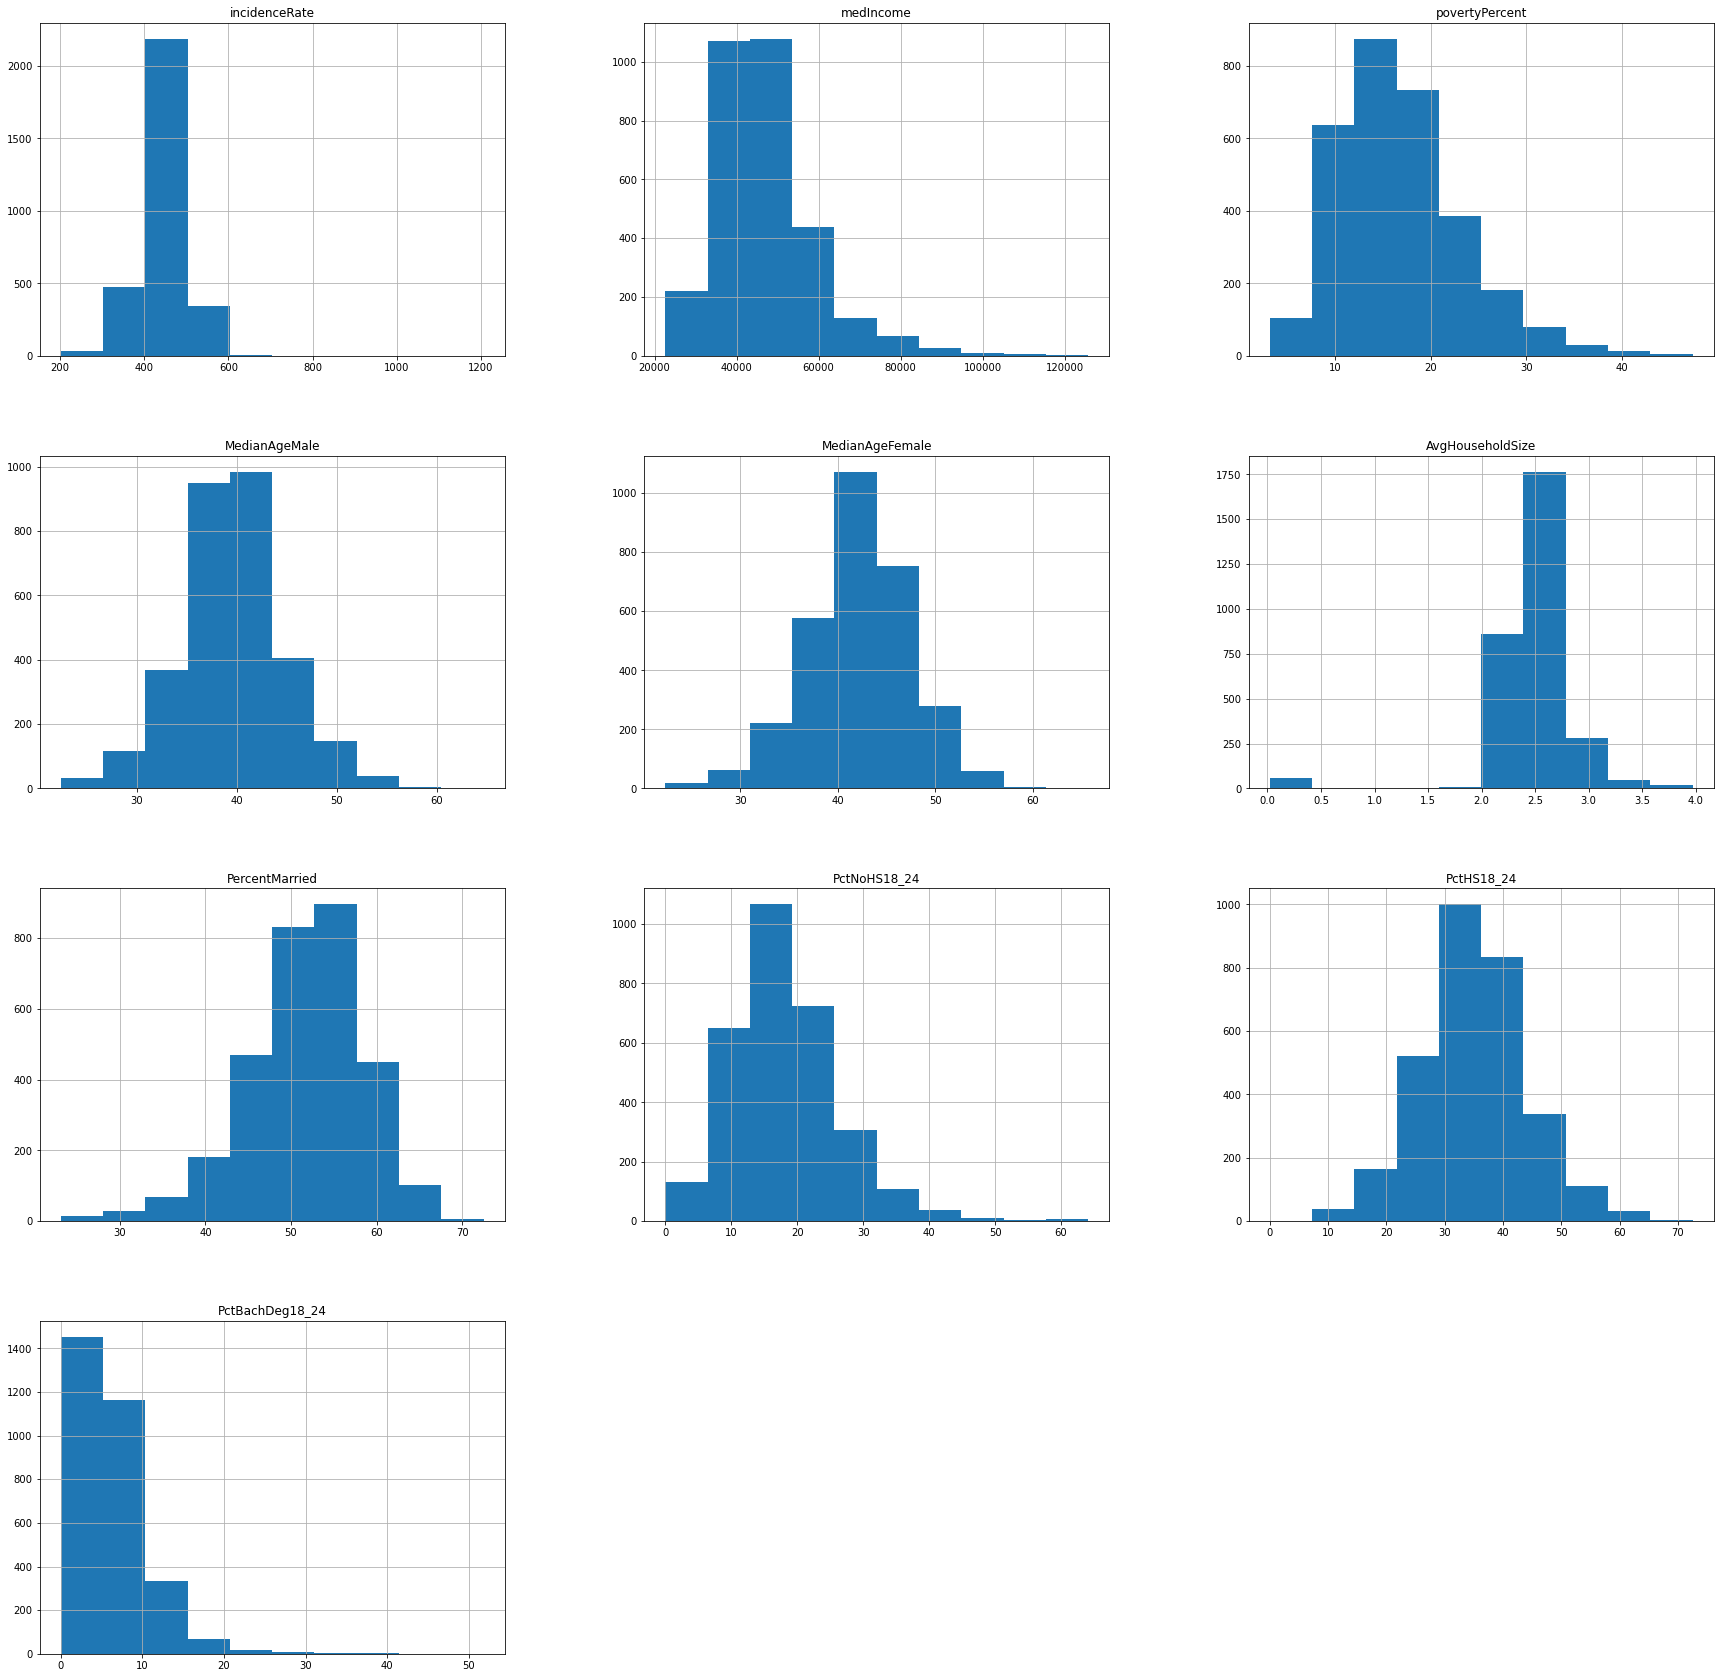

In [20]:
histo=CancerData.hist(['incidenceRate', 'medIncome',
       'povertyPercent', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24'], figsize=(30,30))


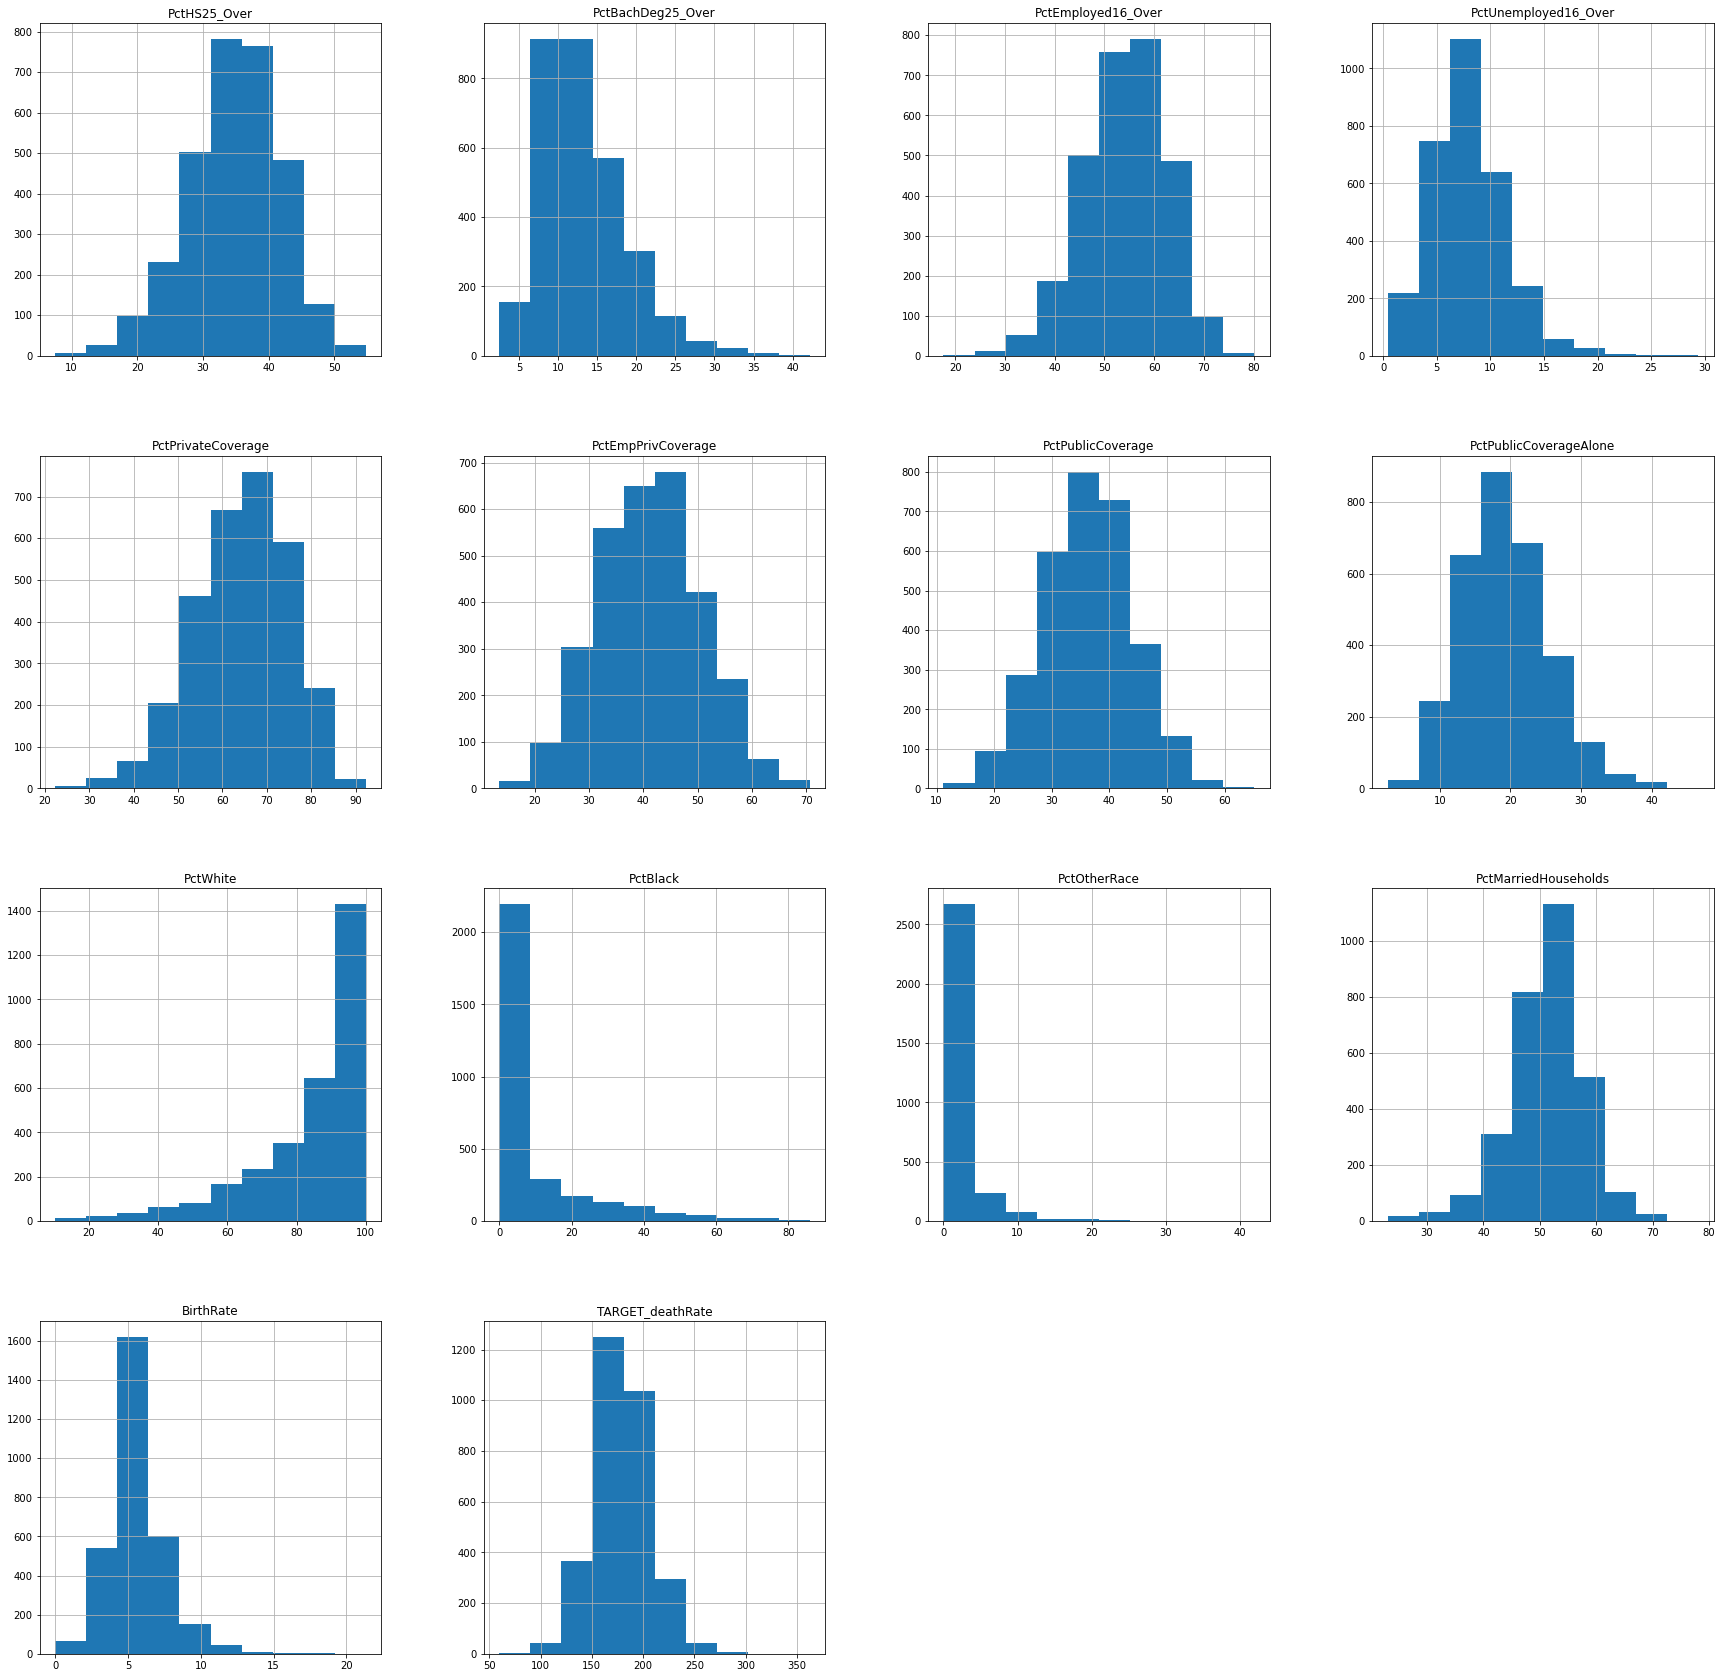

In [21]:
histo = CancerData.hist(['PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
       'TARGET_deathRate'], figsize=(30,30))

In [23]:
CoorData = CancerData.corr()
np.abs(CoorData['TARGET_deathRate']).sort_values(ascending=False)

TARGET_deathRate          1.000000
PctBachDeg25_Over         0.485477
incidenceRate             0.449432
PctPublicCoverageAlone    0.449358
povertyPercent            0.429389
medIncome                 0.428615
PctEmployed16_Over        0.412046
PctHS25_Over              0.404589
PctPublicCoverage         0.404572
PctPrivateCoverage        0.386066
PctUnemployed16_Over      0.378412
PctMarriedHouseholds      0.293325
PctBachDeg18_24           0.287817
PctEmpPrivCoverage        0.267399
PercentMarried            0.266820
PctHS18_24                0.261976
PctBlack                  0.257024
PctOtherRace              0.189894
PctAsian                  0.186331
PctWhite                  0.177400
avgAnnCount               0.143532
popEst2015                0.120073
avgDeathsPerYear          0.090715
PctNoHS18_24              0.088463
BirthRate                 0.087407
AvgHouseholdSize          0.036905
studyPerCap               0.022285
MedianAgeMale             0.021929
MedianAgeFemale     

<AxesSubplot:title={'center':'TARGET_deathRate'}, xlabel='binnedInc'>

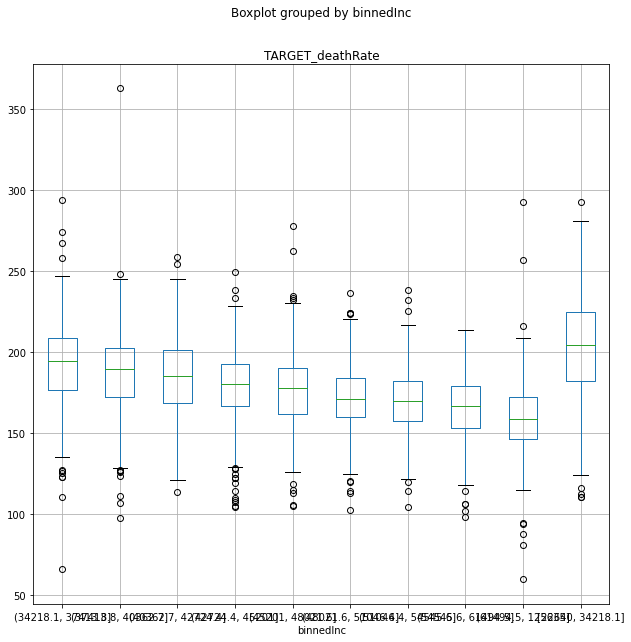

In [24]:
CancerData.boxplot(by='binnedInc', column='TARGET_deathRate', figsize=(10,10))

In [25]:
Predictors = ['PctBachDeg25_Over', 'incidenceRate',
       'PctPublicCoverageAlone', 'povertyPercent', 'medIncome',
       'PctEmployed16_Over', 'PctHS25_Over', 'PctPublicCoverage',
       'PctPrivateCoverage', 'PctUnemployed16_Over', 'PctMarriedHouseholds',
       'PctBachDeg18_24', 'PctEmpPrivCoverage', 'PercentMarried', 'PctHS18_24',
       'PctBlack', 'binnedInc']
Target = ['TARGET_deathRate']
X = CancerData[Predictors].values
y = CancerData[Target].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(2132, 17)
(2132, 1)
(915, 17)
(915, 1)


In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lrRegModel = lr.fit(X_train, y_train)
lrPrediction = lrRegModel.predict(X_test)
from sklearn.metrics import r2_score
print('R2 value', r2_score(y_train, lrRegModel.predict(X_train)))
print('Accuracy', 100-(np.mean((np.abs(y_test-lrPrediction)/y_test))*100))

TestingData = pd.DataFrame(X_test, columns=Predictors)
TestingData['Target'] = y_test
TestingData['PredictedValue'] = lrPrediction
TestingData['APE'] = (np.abs(y_test-lrPrediction)/y_test)*100
TestingData.head()

ValueError: could not convert string to float: '[22640, 34218.1]'